# The Heat equation

## A few theoretical remarks
Heat propagation is described by the differential equation (for a one-dimensional system)
$$\frac{\partial T(x,t)}{\partial t} = \frac{k}{C \rho} \frac{\partial^2 T(x,t)}{\partial x^2},$$
which describes the variation of temperature ($T$) as a function of a coordinate ($x$) and time ($t$).  $k$ is the thermal conductivity, $C$ is the heat capacity and $\rho$ the density of a material.

An analytical solution can be found by separating the variables $x$ and $t$
$$T(x,t)=X(x)\cal{T} (t)$$
Substituting into the original equation, we can rewrite this as two non-coupled ordinary differential equations (ODE) as a function of the $t$ and $x$ variables.
$$\frac{d \cal{T}}{dt} (t) + \alpha^2 \frac{k}{C \rho} {\cal T}(t) = 0, \ \ \ \ \frac{d^2 X}{d x^2}(x) + \alpha^2 X(x)=0,$$
where $\alpha$ is a real number. These are ordinary differential equations, the solutions can be found for set values of $\alpha$. When multiple values of $\alpha$ are allowed, the corresponding solutions need to be added up.

For this project we consider a bar of length $L=0.3$ m with the boundary conditions $T(0,t)=T(L,t)=0$ C, e.g. with the two edges kept at a constant temperature of 0 C. We also assume the initial condition $T(x,0)=T_0=100$C for $0<x<L$. 

The boundary condition requires a solution for $X(x)$ of the type:
$$X(x)=\sin \alpha_n x \ \ \mbox{with} \ \ \alpha_n=n \pi/L$$
Consequently the solution for $\cal{T}(t)$ is written in the form:
$${\cal T}(t)=\exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) } $$
Which leads to the generic solution
$$T(x,t) = \sum_{n=1}^{\infty} A_n \sin (\alpha_n x) \exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) }, $$

To satisfy the initial condition, we can derive the factors $A_n$ of the Fourier serie and write the analytical solution as
$$T(x,t) = \sum_{n=1, 3, 5, ...}^{\infty} \frac{4T_0}{n \pi} \sin (\alpha_n x) \exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) }, $$


In your numerical implementation use Aluminium as a metal with heat conductivity $k=220$ W/(m K), density $\rho=2700$ kg/m$^3$ and specific heat $C=900$ J/(kg K). 




## Question 1: Sum the members of the series
**(8 marks)**

The analytical solution is presented as an infinite serie of terms. Write code to calculate the n-th term of the serie as a function of $x$ and $t$. 
- Plot two graphs, each with the first three terms of the serie (n=1,3,5), for t=0s and t=20s. Comment on the results
- Add the first 50 terms (up to $n=99$) of the serie and plot a graph of $T(x,t)$ for t=0, 20, 100 s. If enough points are used in the $x$ coordinate a ripple is visible in the graph for $t=0$ s. Explain this. 
- Produce a 3D plot showing $T(x,t)$ for t up to 100 s, when adding the first 50 terms. Plot as a wireframe and as a colour temperature map

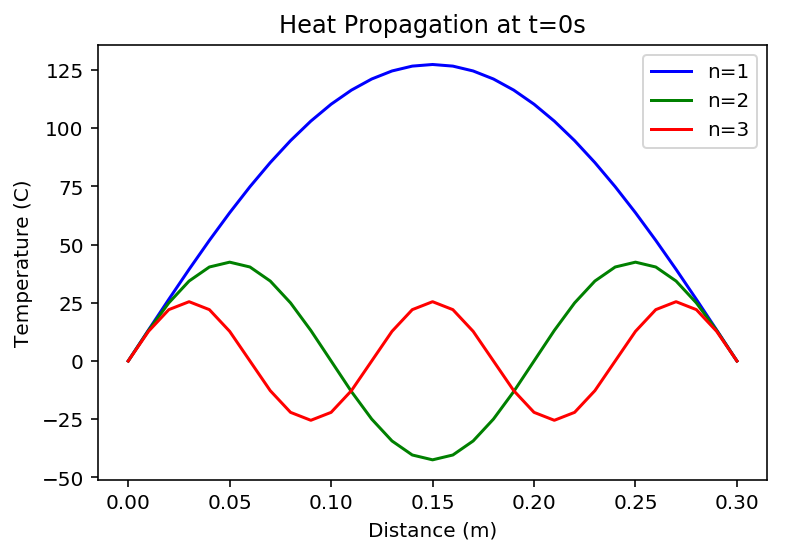

Heat propagation appears to be sinusoidal at this time, with more osicallations occuring at a larger value of n. Temperature fluctuation generally decreases.


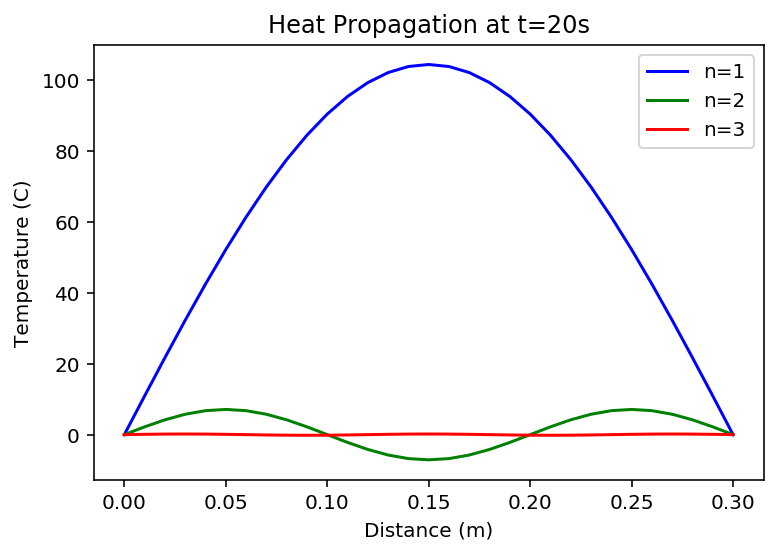

Heat propagation sinusoidal, more oscillations at larger n, temperature fluctuation decreases more sharply than at t=0s.


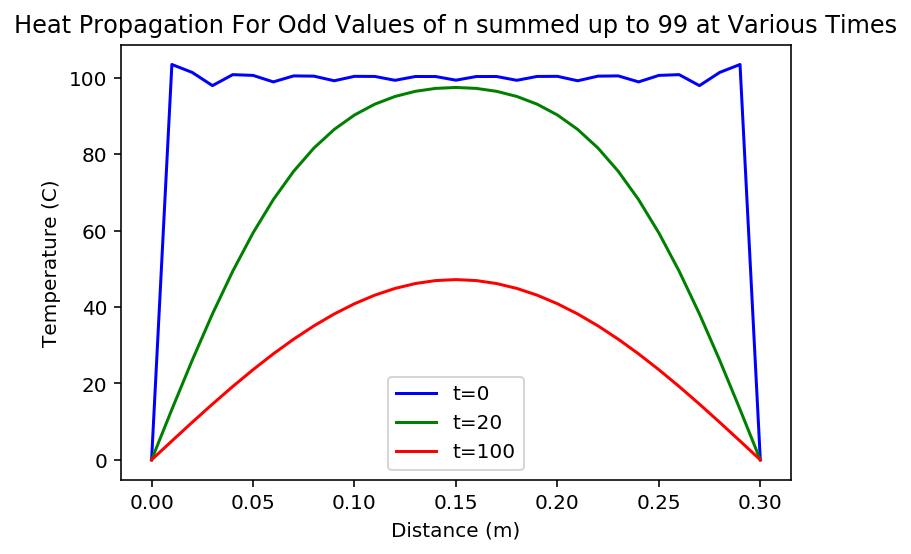

The ripple is a result of a top hat function forced into being represented as a fourier transform.


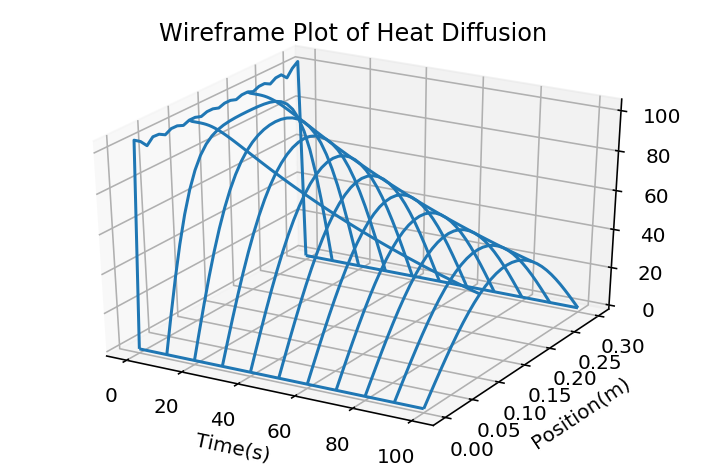

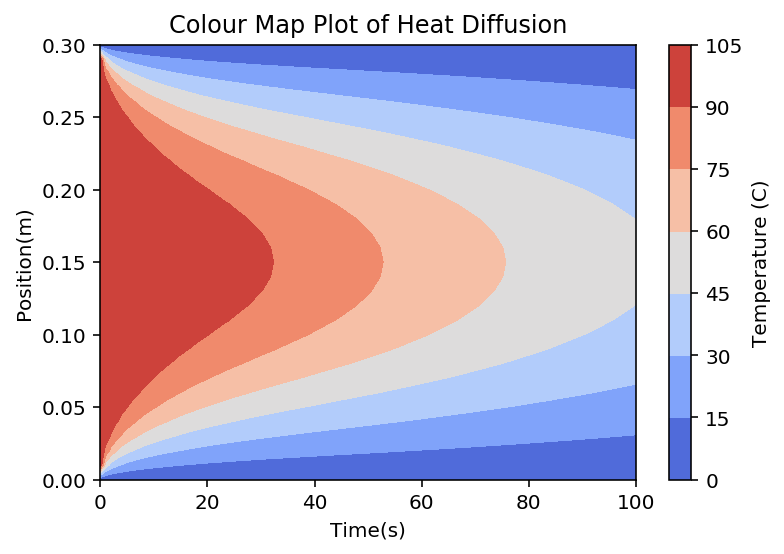

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

#Plot two graphs, each with the first three terms of the serie (n=1,3,5), for t=0s and t=20s. Comment on the results
n1,n2,n3=1,3,5                                        #Assigning the 3 values of n
t1,t2,t3=0,20,100                                     #Assigning values of time
T11,T12,T21,T22,T31,T32=[],[],[],[],[],[]             #Creating empty lists for Temperature at various positions and times
x1=np.linspace(0,0.3,31)                              #Creating an array for the position
x2=np.array(x1).tolist()
x=[float(i) for i in x2]                              #Changing the array into a list and changing the elements of the list into floats

def Temp(n,t,T):                                      #Function to work out the temperature at n=1,3,5
    L=0.3
    k=220
    rho=2700
    C=900
    T0=100
    x1=np.linspace(0,0.3,31)
    x2=np.array(x1).tolist()
    x=[float(i) for i in x2]
    for i in x:
        Temperature=(((4*T0)/(n*math.pi))*(math.sin((n*math.pi*i/L))*math.exp(-(((n**2)*(math.pi**2)*k*t)/((L**2)*C*rho)))))   #Eq fot T(x,t)
        T.append(Temperature)

Temp(n1,t1,T11)                                              #Function applied to n=1,3,5 and t=0,20
Temp(n1,t2,T12)
Temp(n2,t1,T21)
Temp(n2,t2,T22)
Temp(n3,t1,T31)
Temp(n3,t2,T32)

plt.plot(x,T11,'b',label='n=1')                              #Graph of propagation at t=0s
plt.plot(x,T21,'g',label='n=2')
plt.plot(x,T31,'r',label='n=3')
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (C)')
plt.title('Heat Propagation at t=0s')
plt.show()

print('Heat propagation appears to be sinusoidal at this time, with more osicallations occuring at a larger value of n. Temperature fluctuation generally decreases.')

plt.plot(x,T12,'b',label='n=1')                              #Graph of heat propagation at t=20s  Comment on these results
plt.plot(x,T22,'g',label='n=2')
plt.plot(x,T32,'r',label='n=3')
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (C)')
plt.title('Heat Propagation at t=20s')
plt.show()

print('Heat propagation sinusoidal, more oscillations at larger n, temperature fluctuation decreases more sharply than at t=0s.')

#Add the first 50 terms (up to n=99) of the series and plot a graph of T(x,t) for t=0, 20, 100 s. If enough points are used in the  coordinate a ripple is visible in the graph for t=0s

def Temperature(x,t):                                   #Defining function to sum all the temperatures from n=1,3,5...,99 at a certain position and time
    L=0.3
    k=220
    rho=2700
    C=900
    T0=100
    a=0              #Variable to keep a running total of all the temperature values for all odd n at values of x and t
    for n in range(1,100):
        if n%2==0:          #Ignore even values of n
            pass
        else:
            Temperature=(((4*T0)/(n*math.pi))*(math.sin((n*math.pi*x/L))*math.exp(-(((n**2)*(math.pi**2)*k*t)/((L**2)*C*rho)))))
            a+=Temperature
    return a

T1,T2,T3=[],[],[]    #Create empty lists for values of a temperature at t=0,20 and 100s

for i in x:
    T1.append(Temperature(i,t1))
    T2.append(Temperature(i,t2))
    T3.append(Temperature(i,t3))

plt.plot(x,T1,'b',label='t=0')    #Plot of heat propagation for odd values of n up to 99 at t=0,20 and 100s
plt.plot(x,T2,'g',label='t=20')
plt.plot(x,T3,'r',label='t=100')
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (C)')
plt.title('Heat Propagation For Odd Values of n summed up to 99 at Various Times')
plt.show()

print('The ripple is a result of a top hat function forced into being represented as a fourier transform.')

#Produce a 3D plot showing T(x,t) for t up to 100 s, when adding the first 50 terms. Plot as a wireframe and as a colour temperature map

Temp=[]     #Creating empty lists for values of temperature and time
t=[]

for i in range (0,101):      #Adding values of time for 0-100 seconds to list t
    t.append(i)

for i in x:                            #Nested loop for calculating values of temperature at all values of x and t
    for s in range(len(t)):
        Temp.append(Temperature(i,t[s]))

X,Y=np.meshgrid(np.array(t),np.array(x))     #Using meshgrid to arrange the position and time arrays into a plottable format
Z=np.array(Temp).reshape(31,101)                #Reshaping the Temperature array to be used in a plottable format

fig = plt.figure()                                  #Wireframe plot, cstride and rstride representing the density of the wires in the plot
ax = fig.add_subplot(1,1,1, projection='3d')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Wireframe Plot of Heat Diffusion')
ax.plot_wireframe(X,Y,Z,rstride=10,cstride=10)
plt.show()

fig2 = plt.figure()                                     #Colourmap represented as a countourf plot
ax = fig2.add_subplot(1,1,1)
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Colour Map Plot of Heat Diffusion')
plt.contourf(X,Y,Z,cmap=cm.coolwarm,antialiased=False)
cbar=plt.colorbar()
cbar.ax.set_ylabel('Temperature (C)')
plt.show()

## Question 2: Numerical solution
**(8 marks) **

A solution can be found numerically using time steps with the so-called "leap frog" method. To do this we replace the derivative in time with the approximation
$$\frac{\partial T(x,t)}{\partial t} = \frac{T(x,t+\Delta t)-T(x,t)}{\Delta t} + ...$$
To approximate the second derivative over $x$ we write
$$T(x+\Delta x,t ) = T(x,t) + \frac{\partial T(x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 T(x,t)}{\partial x^2} (\Delta x)^2+...$$
$$T(x-\Delta x,t ) = T(x,t) - \frac{\partial T(x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 T(x,t)}{\partial x^2} (\Delta x)^2+...$$
Adding the two terms and solving for the second derivative we obtain
$$\frac{\partial^2 T(x,t)}{\partial x^2} = \frac{1}{\Delta x^2} \left[T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right]$$
Substituting both approximations in the heat equations
$$\frac{T(x,t+\Delta t)-T(x,t)}{\Delta t} = \frac{k}{c \rho} \frac{1}{\Delta x^2} \left[T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right]$$
By which we get
$$T(x,t+\Delta t)=T(x,t) + \eta \left[ T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right] \ \ \ , \ \eta=\frac{k \Delta t}{c \rho \Delta x^2} $$
Thus we can evaluate the value of $T(x,t+\Delta t)$ once the value of $T(x,t)$ is known. The numerical method will consist in starting with the given initial condition at $t=0$ and propagate that forward in time, hence the name of "leap frog".

Create a matrix of points $T_{i,j}$ with intervals $\Delta t$ and $\Delta x$ and solve the equation using the leapfrog method:
$$T_{i,j+1}=T_{i,j} + \eta \left[T_{i+1,j}+T_{i-1,j}-2T_{i,j} \right], \ \ \ \eta=\frac{k\Delta t}{C \rho \Delta x^2}$$
Where we have indicated $x=i \Delta x$ and $t=j \Delta t$. For this exercise use $\Delta x=0.01$m and $\Delta t=0.5$s 
- Plot T(x,t) for t=0, 20, 100s and compare with the plot in Exercise 1
- Repeat the 3-D $T(x,t)$ wireframe plot of Exercise 1. 
- Plot the differences between this result and the truncated serie from Exercise 1 for $t=20$ and 100s

(you should use numpy arrays to save the $T_{i,j}$ array as you go along)

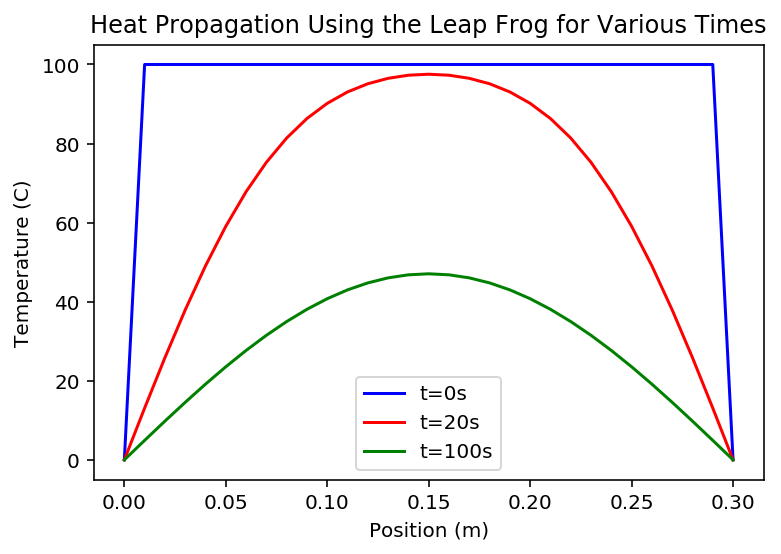

The plot is very similar to summing series of T(x,t), with the notable difference being the lack of ripples at t=0s. This is due to the leap frog method not involving fourier transforms.


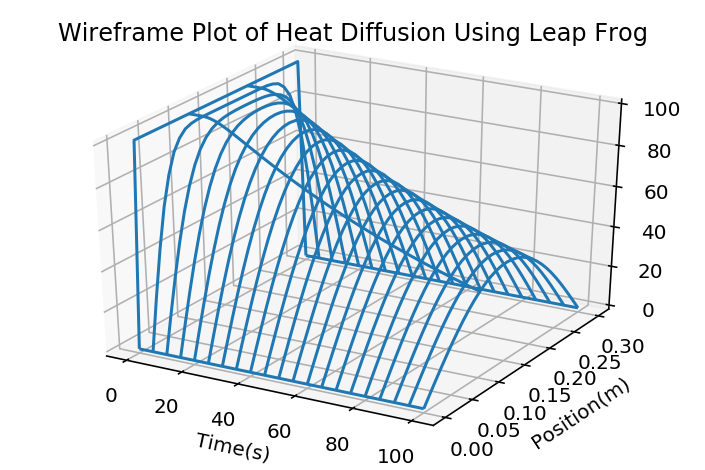

The top of the wireframe displays the lack of ripples of temperature at t=0s.


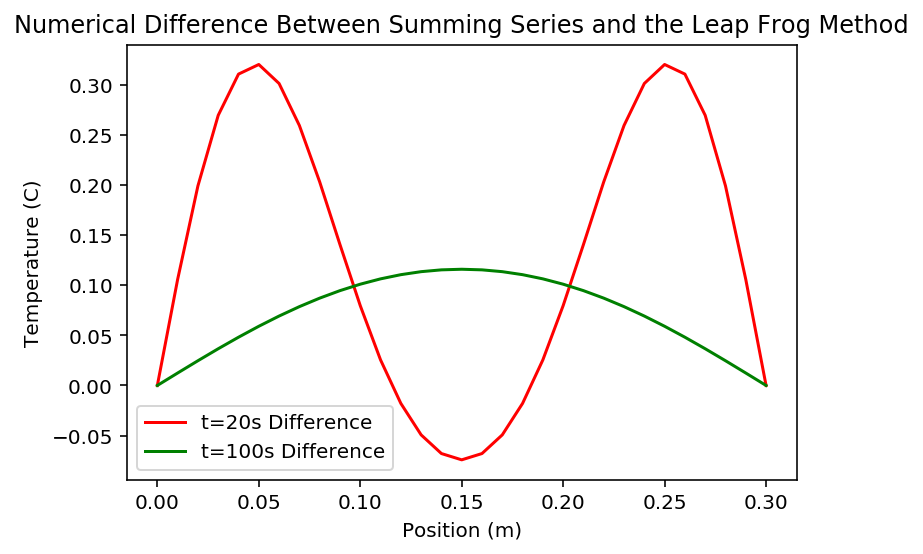

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Plot T(x,t) for t=0, 20, 100s and compare with the plot in Exercise 1

L=0.3             #Assigning needed variables for length of the bar, conductivity, density, specific heat and initial temperature etc.
k=220
rho=2700
C=900
T0=100
dx=0.01
Nx=31
dt=0.5
Nt=201
eta=(k*dt)/(C*rho*(dx**2))      #Formula for eta
T=np.zeros((Nx,Nt))             #Creating an empty array for Tij

for ix in range(1,Nx-1):        #Assigning boundary conditions for the Tij array
    T[ix,0]=100
    T[0,0]=0
    T[0,1]=0
    T[Nx-1,0]=0
    T[Nx-1,1]=0

def LF(T,i,j,eta):                    #Defining function to work out Ti,j+1
    return T[i,j-1]+((eta*(T[i+1,j-1]+T[i-1,j-1]-(2*T[i,j-1]))))

for j in range(1,Nt):             #Nested loop to work out the Tij array for the ranges of position and time defined earlier in the code
    for i in range(1,Nx-1):
        T[i,j]=LF(T,i,j,eta)

plt.plot(np.linspace(0,0.3,31),T[:,0],'b',label='t=0s')          #Plot for T(x,t) at t=0,20 and 100s, linspace to create 31 points of position between 0 and 0.3 as required for the length of the bar and the step sizes, T[:,#] to obtain all the values of temperature at all points along the bar at a particular time
plt.plot(np.linspace(0,0.3,31),T[:,40],'r',label='t=20s')
plt.plot(np.linspace(0,0.3,31),T[:,200],'g',label='t=100s')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Heat Propagation Using the Leap Frog for Various Times')
plt.show()

print('The plot is very similar to summing series of T(x,t), with the notable difference being the lack of ripples at t=0s. This is due to the leap frog method not involving fourier transforms.')

#Repeat the 3-D T(x,t) wireframe plot of Exercise 1.

X,Y=np.meshgrid(range(Nt),range(Nx))             #Meshgrid arranges arrays for position and temperature into a plottable format

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Wireframe Plot of Heat Diffusion Using Leap Frog')
ax.plot_wireframe(X/2,Y/100,T,rstride=10,cstride=10)                      #X/2 and Y/100 to account for the fact there is a difference between the length of steps and
plt.show()                                                                #actual time and position

print('The top of the wireframe displays the lack of ripples of temperature at t=0s.')

#Plot the differences between this result and the truncated serie from Exercise 1 for 20s and 100s

NewT2=-T[0:31,40]+T2                 #Creating new arrays which are the differences between the summing method and the leap frog method at all values of Temperature
NewT3=-T[0:31,200]+T3

plt.plot(np.linspace(0,0.3,31),NewT2,'r',label='t=20s Difference')
plt.plot(np.linspace(0,0.3,31),NewT3,'g',label='t=100s Difference')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Numerical Difference Between Summing Series and the Leap Frog Method')
plt.show()

## Question 3: Stability study
**(4 marks)**

In this section we evaluate how the quality of our solution depends on the choice of $\Delta x$ and $\Delta t$. 
- Fix $\Delta x = 0.01$ m and change the value of $\Delta t$ to 0.2 s and 1 s. Compare the results with those obtained in exercise 2. 
- Fix $\Delta t = 0.5$ s and change the value of $\Delta x$ to 0.02 m and 0.005 m. Compare the results with those obtained in exercise 2.

When showing your comparisons, plot the difference between the solution in Exercise 2 and what you obtain here.

Next week, I will show you how the solution is expected to be stable only if $\eta < 0.5$. Comment on the results you obtained


These are the Comparisons Between the Excercise 2 Graphs and the Different Values of Eta Calculated Here in Excercise 3


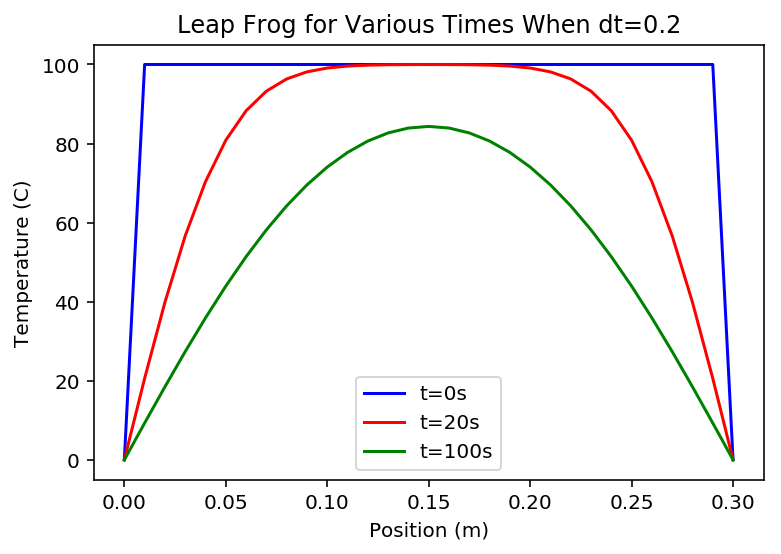

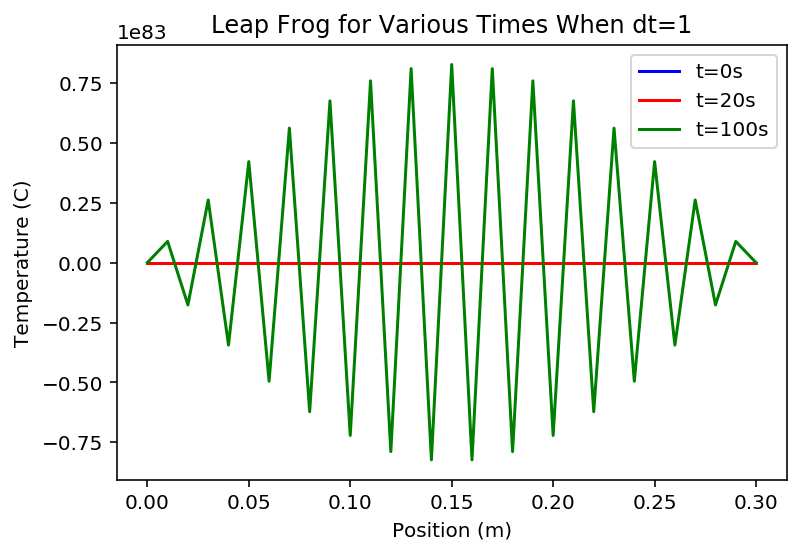

When position step size was fixed, when dt=1 eta becomes greater than 0.5 and therefore the solution becomes unstable. This is not the case for dt=0.2 as eta is less than 0.5. Compared to when dt=0.5, dt=0.2 has the t=100s solution having a much higher amplitude. Also, the t=20s peak is much wider when dt=0.2, as well as the amplitude being slightly larger.


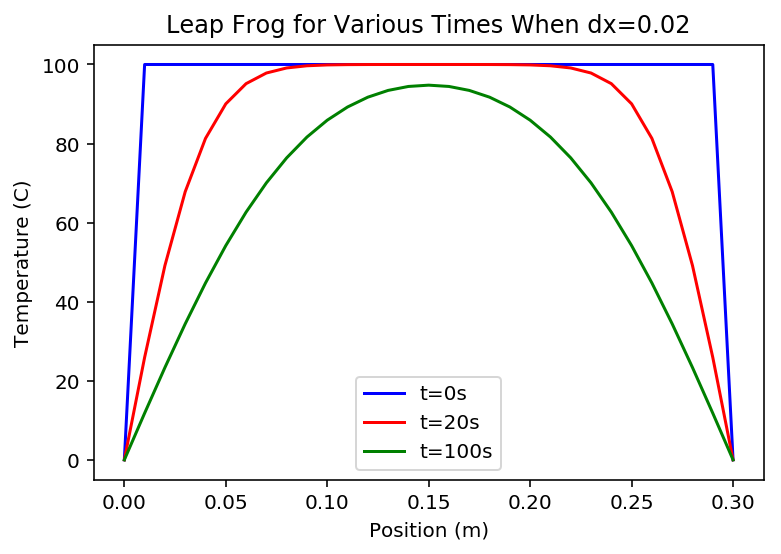

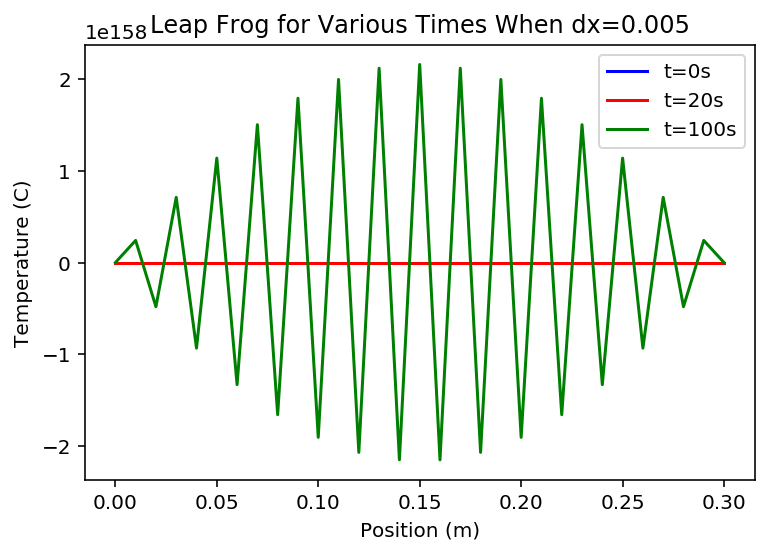

When time step size was fixed, when dx=0.005 eta becomes greater than 0.5 and therefore the solution becomes unstable. This is not the case for dx=0.02 as eta is less than 0.5. Compared to when dx=0.01, dx=0.02 has the t=100s solution having a much higher amplitude. Also, the t=20s peak is much wider when dt=0.2as well as the amplitude being slightly larger.


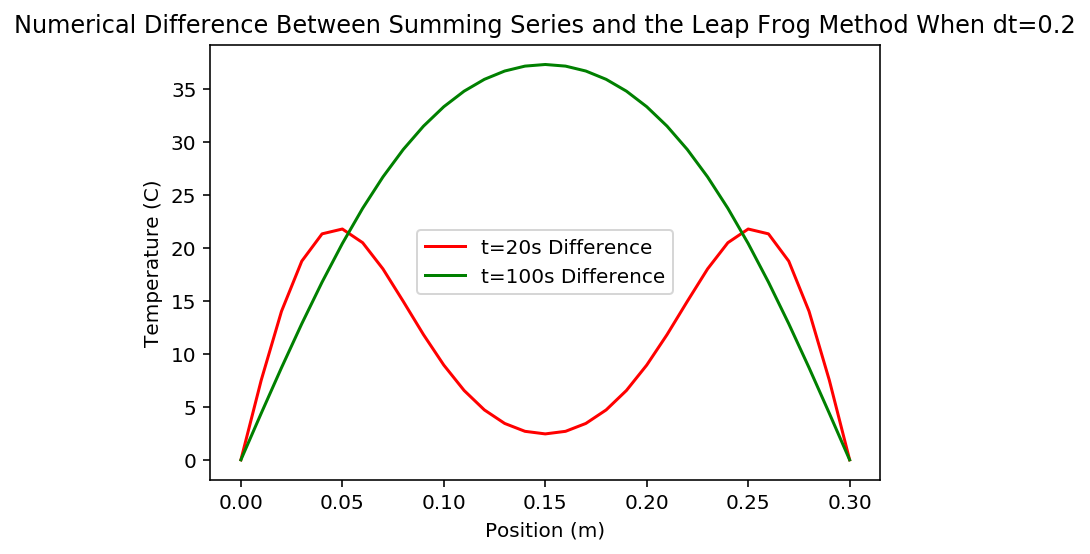

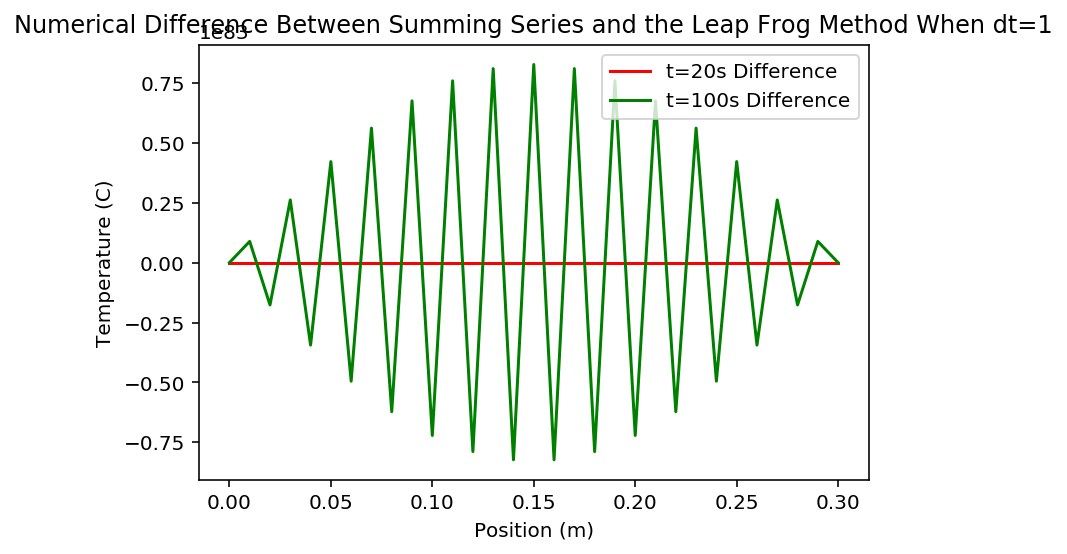

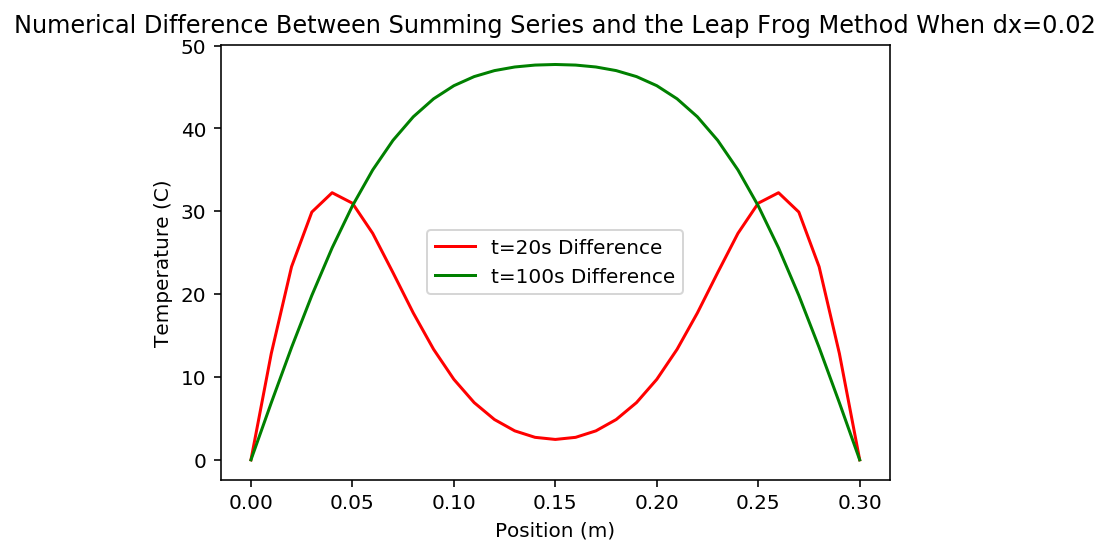

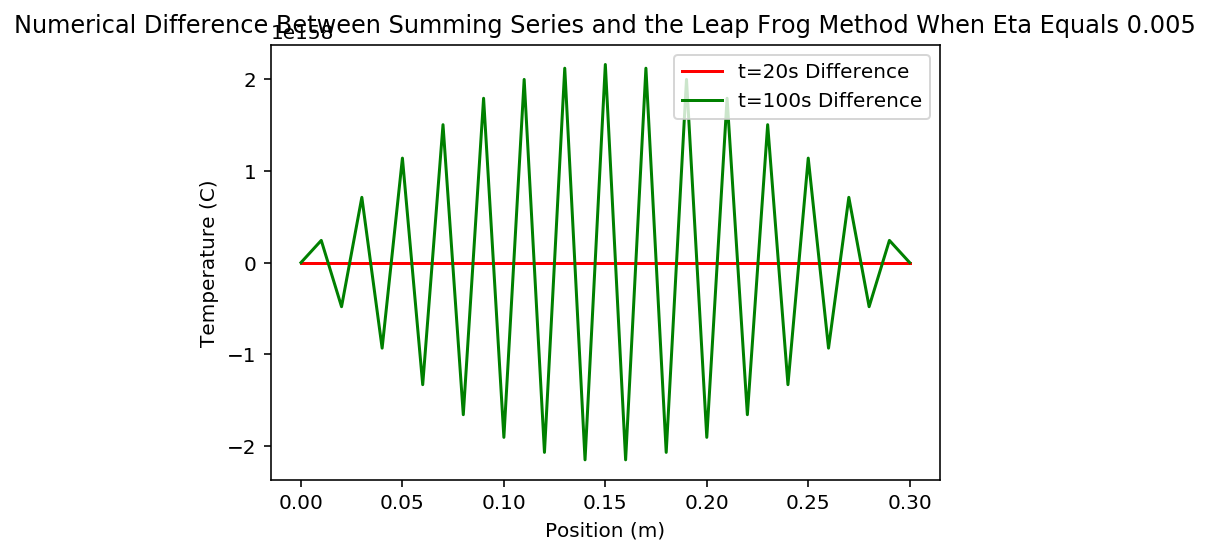

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dx=0.01           #Assigning values of dx and dt, step sizes
dx1=0.02
dx2=0.005
dt=0.5
dt1=0.2
dt2=1
Nx=31             #Assigning values of range of positions and times
Nt=201

def eta(dx,dt):         #Defining a function to work out eta
    k=220
    rho=2700
    C=900
    eta=(k*dt)/(C*rho*(dx**2))
    return eta

Ta1=np.zeros((Nx,Nt))     #Creating 4 new arrays for the 4 configurations of step sizes detailed in the question
Ta2=np.zeros((Nx,Nt))
Ta3=np.zeros((Nx,Nt))
Ta4=np.zeros((Nx,Nt))

for ix in range(1,Nx-1):   #Assigning boundary conditions to all the new arrays created
    Ta1[ix,0]=100
    Ta1[0,0]=0
    Ta1[0,1]=0
    Ta1[Nx-1,0]=0
    Ta1[Nx-1,1]=0
    Ta2[ix,0]=100
    Ta2[0,0]=0
    Ta2[0,1]=0
    Ta2[Nx-1,0]=0
    Ta2[Nx-1,1]=0
    Ta3[ix,0]=100
    Ta3[0,0]=0
    Ta3[0,1]=0
    Ta3[Nx-1,0]=0
    Ta3[Nx-1,1]=0
    Ta4[ix,0]=100
    Ta4[0,0]=0
    Ta4[0,1]=0
    Ta4[Nx-1,0]=0
    Ta4[Nx-1,1]=0
    
def LF(T,i,j,eta):      #Defining function to work out Ti,j+1
    return T[i,j-1]+((eta*(T[i+1,j-1]+T[i-1,j-1]-(2*T[i,j-1]))))

for j in range(1,Nt):       #Nested loop to work out all values of temperature at all positions and times at the various step sizes
    for i in range(1,Nx-1):
        Ta1[i,j]=LF(Ta1,i,j,eta(dx,dt1))
        Ta2[i,j]=LF(Ta2,i,j,eta(dx,dt2))
        Ta3[i,j]=LF(Ta3,i,j,eta(dx1,dt))
        Ta4[i,j]=LF(Ta4,i,j,eta(dx2,dt))

print('These are the Comparisons Between the Excercise 2 Graphs and the Different Values of Eta Calculated Here in Excercise 3')

plt.plot(np.linspace(0,0.3,31),Ta1[:,0],'b',label='t=0s')        #Linspace to create 31 points of position along the bar
plt.plot(np.linspace(0,0.3,31),Ta1[:,40],'r',label='t=20s')
plt.plot(np.linspace(0,0.3,31),Ta1[:,200],'g',label='t=100s')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Leap Frog for Various Times When dt=0.2')
plt.show()

plt.plot(np.linspace(0,0.3,31),Ta2[:,0],'b',label='t=0s')
plt.plot(np.linspace(0,0.3,31),Ta2[:,40],'r',label='t=20s')
plt.plot(np.linspace(0,0.3,31),Ta2[:,200],'g',label='t=100s')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Leap Frog for Various Times When dt=1',)
plt.show()

print('When position step size was fixed, when dt=1 eta becomes greater than 0.5 and therefore the solution becomes unstable. This is not the case for dt=0.2 as eta is less than 0.5. Compared to when dt=0.5, dt=0.2 has the t=100s solution having a much higher amplitude. Also, the t=20s peak is much wider when dt=0.2, as well as the amplitude being slightly larger.')

plt.plot(np.linspace(0,0.3,31),Ta3[:,0],'b',label='t=0s')               #Linspace to create 31 points of position along the bar
plt.plot(np.linspace(0,0.3,31),Ta3[:,40],'r',label='t=20s')
plt.plot(np.linspace(0,0.3,31),Ta3[:,200],'g',label='t=100s')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Leap Frog for Various Times When dx=0.02')
plt.show()

plt.plot(np.linspace(0,0.3,31),Ta4[:,0],'b',label='t=0s')
plt.plot(np.linspace(0,0.3,31),Ta4[:,40],'r',label='t=20s')
plt.plot(np.linspace(0,0.3,31),Ta4[:,200],'g',label='t=100s')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Leap Frog for Various Times When dx=0.005')
plt.show()

print('When time step size was fixed, when dx=0.005 eta becomes greater than 0.5 and therefore the solution becomes unstable. This is not the case for dx=0.02 as eta is less than 0.5. Compared to when dx=0.01, dx=0.02 has the t=100s solution having a much higher amplitude. Also, the t=20s peak is much wider when dt=0.2as well as the amplitude being slightly larger.')

#Plot the difference

NewT12=Ta1[0:31,40]-T[0:31,40]           #Calculate the differences between the Q2 array and the Q3 arrays
NewT13=Ta1[0:31,200]-T[0:31,200]
NewT22=Ta2[0:31,40]-T[0:31,40]
NewT23=Ta2[0:31,200]-T[0:31,200]
NewT32=Ta3[0:31,40]-T[0:31,40]
NewT33=Ta3[0:31,200]-T[0:31,200]
NewT42=Ta4[0:31,40]-T[0:31,40]
NewT43=Ta4[0:31,200]-T[0:31,200]

plt.plot(np.linspace(0,0.3,31),NewT12,'r',label='t=20s Difference')            #Linspace to create 31 points of position along the bar
plt.plot(np.linspace(0,0.3,31),NewT13,'g',label='t=100s Difference')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Numerical Difference Between Summing Series and the Leap Frog Method When dt=0.2')
plt.show()

plt.plot(np.linspace(0,0.3,31),NewT22,'r',label='t=20s Difference')
plt.plot(np.linspace(0,0.3,31),NewT23,'g',label='t=100s Difference')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Numerical Difference Between Summing Series and the Leap Frog Method When dt=1')
plt.show()

plt.plot(np.linspace(0,0.3,31),NewT32,'r',label='t=20s Difference')
plt.plot(np.linspace(0,0.3,31),NewT33,'g',label='t=100s Difference')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Numerical Difference Between Summing Series and the Leap Frog Method When dx=0.02')
plt.show()

plt.plot(np.linspace(0,0.3,31),NewT42,'r',label='t=20s Difference')
plt.plot(np.linspace(0,0.3,31),NewT43,'g',label='t=100s Difference')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Numerical Difference Between Summing Series and the Leap Frog Method When Eta Equals 0.005')
plt.show()

## Question 4: Sinusoidal initial distribution
**(5 marks)**

A comparison between the numerical solution (via the leap-frog method) and analytical solution (truncated series) is difficult, as it is difficult to estabilish the approximations made for both of them. To gain better numerical insight on the numerical solutions, we repeat the simulations for a case where the exact solution is known, eg the case when the initial condition is given by
$$T(x,0)=T_0 \sin (\pi/L x)$$
In this case only the first term of the serie will be different from zero and the analytical solution does not involve any summation
$$T(x,t)=T_0 \sin (\pi/L x) \exp{\left( -\frac{\pi^2 kt}{L^2 C \rho} \right) }$$
- Repeat the numerical solution with this initial condition and compare the results obtained with the leap-frog method and $\Delta t= 0.5$s, $\Delta x$=0.01m


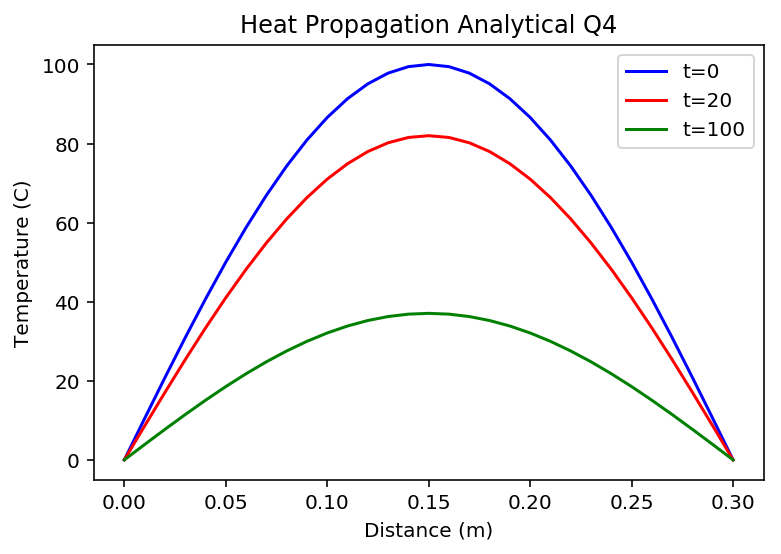

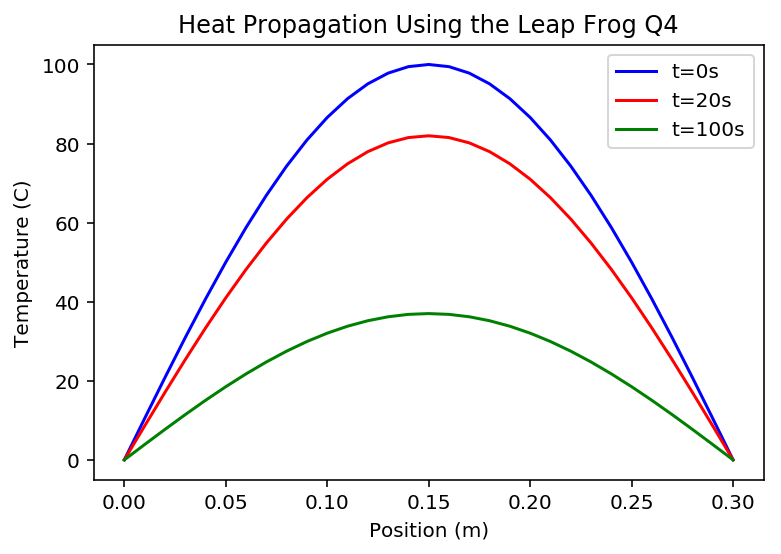

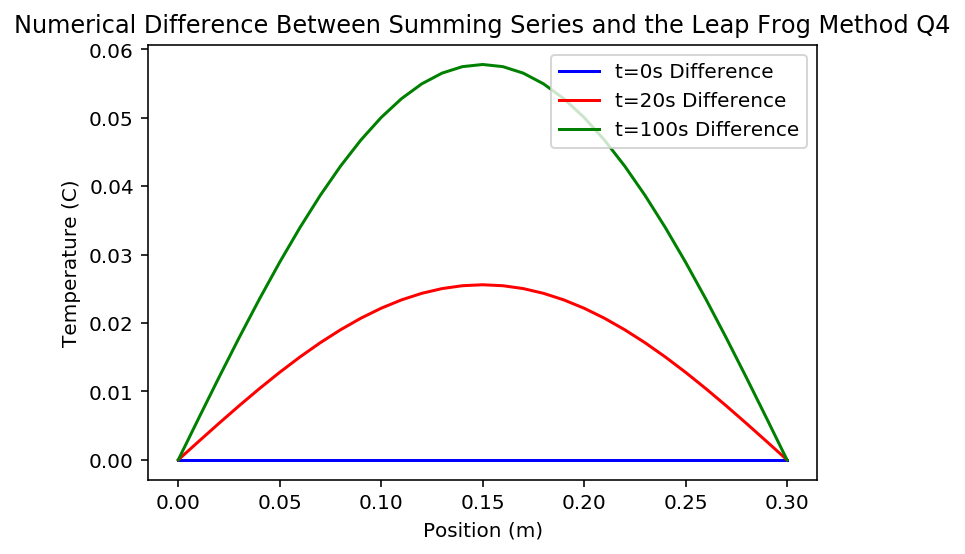

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Analytical solution but with the inital condition and a different equation

def Analytical(x,t):       #Defining function to work out the temperature at different times 
    L=0.3
    k=220
    rho=2700
    C=900
    T0=100
    if t==0:          #Include initial condition
        Temperature=T0*np.sin((np.pi)/L*x) 
    else:             #Include singular expression, now summing of n no longer required
        Temperature=T0*np.sin((np.pi)/L*x)*np.exp(-(((np.pi)**2)*k*t)/((L**2)*C*rho))
    return Temperature

AT1,AT2,AT3=[],[],[]    #Create empty lists for values of a temperature at t=0,20 and 100s, also create values for x and t
t1,t2,t3=0,20,100
x1=np.linspace(0,0.3,31)
x2=np.array(x1).tolist()
x=[float(i) for i in x2]

for i in x:                            #Add values of temperature to lists
    AT1.append(Analytical(i,t1))
    AT2.append(Analytical(i,t2))
    AT3.append(Analytical(i,t3))

plt.plot(x,AT1,'b',label='t=0')    #Plot of heat propagation new equation and inital condition at t=0,20 and 100s
plt.plot(x,AT2,'r',label='t=20')
plt.plot(x,AT3,'g',label='t=100')
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (C)')
plt.title('Heat Propagation Analytical Q4')
plt.show()

#Leap Frog Method With Initial condition

L=0.3             #Assingning needed variables for length of the bar, conductivity, density, specific heat and initial temperature etc.
k=220
rho=2700
C=900
T0=100
dx=0.01
Nx=31
dt=0.5
Nt=201
eta=(k*dt)/(C*rho*(dx**2))           #Formula for eta
FinalT=np.zeros((Nx,Nt))             #Creating an empty array for Tij

for ix in range(1,Nx-1):        #Assigning boundary conditions for the Tij array
    FinalT[ix,0]=T0*np.sin((np.pi)/L*(ix*0.01))     #Adding in the new initial conditions
    FinalT[0,0]=0
    FinalT[0,1]=0
    FinalT[Nx-1,0]=T0*np.sin((np.pi)/L*((Nx-1)*0.01))        #As Nx-1 is 30, the position is 0.3m the value of the initial condition is 57.22C as the condition needs to be an integer value
    FinalT[Nx-1,1]=0

def LF(T,i,j,eta):                    #Defining function to work out Ti,j+1
    return T[i,j-1]+((eta*(T[i+1,j-1]+T[i-1,j-1]-(2*T[i,j-1]))))

for j in range(1,Nt):             #Nested loop to work out the Tij array for the ranges of position and time defined earlier in the code
    for i in range(1,Nx-1):
        FinalT[i,j]=LF(FinalT,i,j,eta)

plt.plot(np.linspace(0,0.3,31),FinalT[:,0],'b',label='t=0s')          #Plot for leap frog with additional initial condition
plt.plot(np.linspace(0,0.3,31),FinalT[:,40],'r',label='t=20s')
plt.plot(np.linspace(0,0.3,31),FinalT[:,200],'g',label='t=100s')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Heat Propagation Using the Leap Frog Q4')
plt.show()

#Plot the difference

DiffT1=-FinalT[0:31,0]+AT1
DiffT2=-FinalT[0:31,40]+AT2                 #Creating new arrays which are the differences between the analytical method and the leap frog method
DiffT3=-FinalT[0:31,200]+AT3

plt.plot(np.linspace(0,0.3,31),DiffT1,'b',label='t=0s Difference')
plt.plot(np.linspace(0,0.3,31),DiffT2,'r',label='t=20s Difference')
plt.plot(np.linspace(0,0.3,31),DiffT3,'g',label='t=100s Difference')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Numerical Difference Between Summing Series and the Leap Frog Method Q4')
plt.show()

## Question 5: Compute performance (PHY428)
**(PHY428 - optional for PHY328)** <br>
**(5 marks). Note, the total will be normalised back to 25**

Measure the wall clock time taken for different solutions:
- For a maximum time $t=100$ s and 100 points along the bar. How long does it take to add up the first N terms of the serie? Show the result in a graph as a function of N, up to N=1000. 
- Using the leap-frog numerical solution, show the time needed to evaluate the first 100 s of the solution as a function of $\Delta x$ and $\Delta t$. Present two graphs, one where $\Delta x$ is fixed and one when $\Delta t$ is fixed. Mark on the graph where the $\eta=0.5$ condition is reached.
- Can you think of ways to make the program run faster? If so, explain how you modified your code to achieve faster performance.

(Use the time.process_time() function to evaluate the time taken)



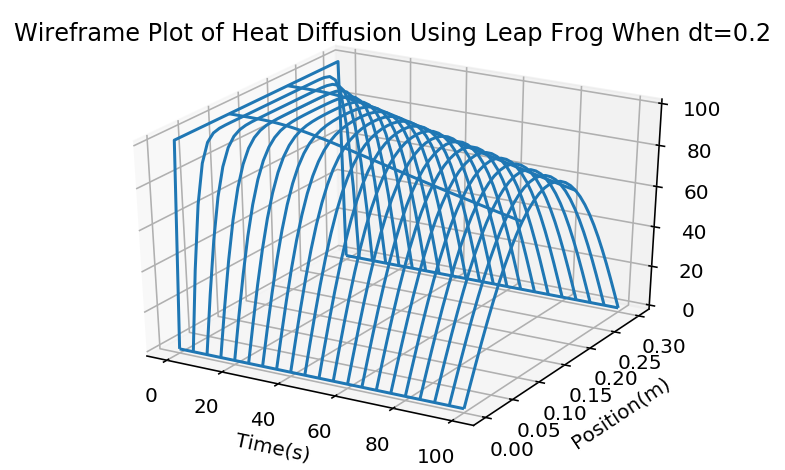

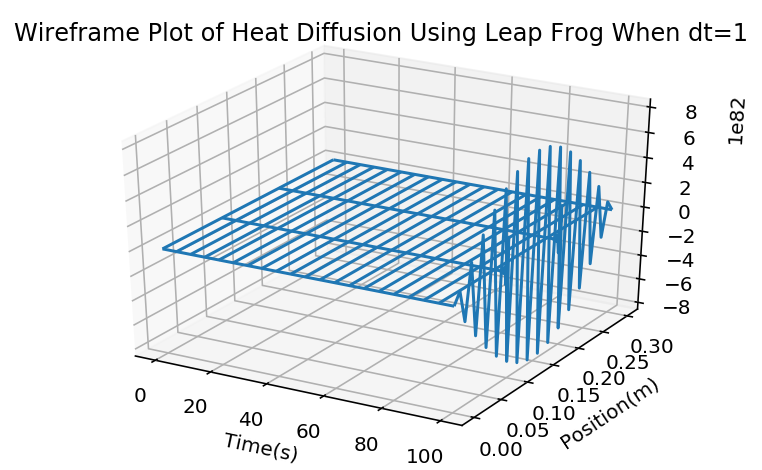

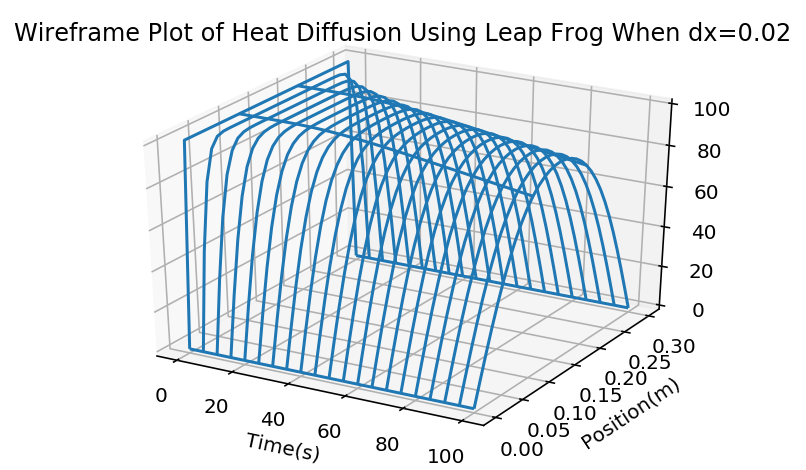

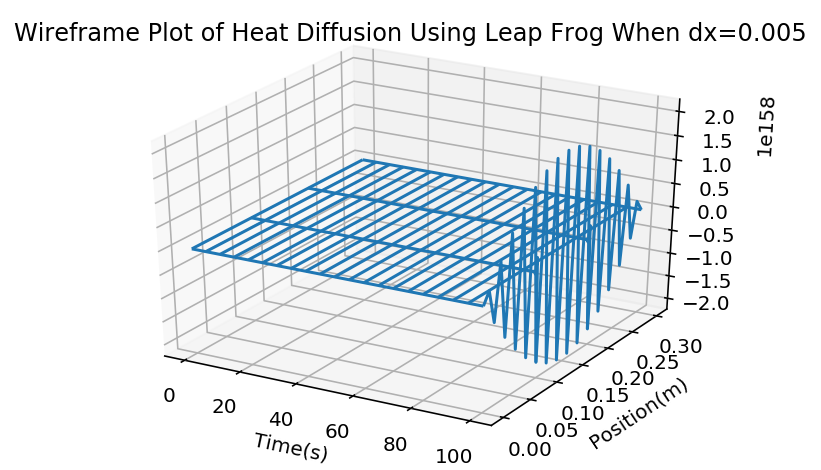

In [5]:

X1,Y1=np.meshgrid(range(Nt),range(Nx))
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Wireframe Plot of Heat Diffusion Using Leap Frog When dt=0.2')
ax.plot_wireframe(X1/2,Y1/100,Ta1,rstride=10,cstride=10)
plt.show()

X2,Y2=np.meshgrid(range(Nt),range(Nx))
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Wireframe Plot of Heat Diffusion Using Leap Frog When dt=1')
ax.plot_wireframe(X2/2,Y2/100,Ta2,rstride=10,cstride=10)
plt.show()

X3,Y3=np.meshgrid(range(Nt),range(Nx))
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Wireframe Plot of Heat Diffusion Using Leap Frog When dx=0.02')
ax.plot_wireframe(X3/2,Y3/100,Ta3,rstride=10,cstride=10)
plt.show()

X4,Y4=np.meshgrid(range(Nt),range(Nx))
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Wireframe Plot of Heat Diffusion Using Leap Frog When dx=0.005')
ax.plot_wireframe(X4/2,Y4/100,Ta4,rstride=10,cstride=10)
plt.show()

